<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="360" height="160" /></center>

# <center>Regression - Predicting Beijing's Air Pollution</center>

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
  - 2.1 [Installing and upgrading packages](#section21)<br>
  - 2.2 [Importing packages](#section22)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Description of the Dataset](#section31)<br>
  - 3.2 [Pandas Profiling before Data Preprocessing](#section32)<br>
4. [Data Exploration](#section4)<br>
  - 4.1 [Data Preprocessing](#section41)<br>
  - 4.2 [Exploratory Data Analysis](#section42)<br>
    - 4.2.1 [Pandas Profiling after Data Preprocessing](#section421)<br>
    - 4.2.2 [Data exploration](#section422)
    - 4.2.3 [Yearly Data exploration](#section423)
    - 4.2.4 [Monthly Data exploration](#section422)
5. [Feature Engineering and selection](#section5)<br>
   - 5.1 [Encoding Categorical data](#section51)<br>
6. [Model building](#section6)<br>
   - 6.1 [Linear Regression Model](#section61)<br>
   - 6.2 [Decision Tree Model](#section62)<br>
   - 6.3 [Random Forest Model](#section63)<br>
7. [Predicting on Test Data](#section7)<br>
8. [Conclusion](#section8)

<a id=section1></a>
## 1. Problem Statement
- **China** is **notorious** for being a **major polluter**. Its economic growth in the past three decades has been the fastest among major nations, **which is the main factor in why China has extensive air pollution**. 

- **China’s Environmental Sustainability Index** is ranked near the **bottom among countries worldwide**.

- **Air-Pollution** in **Beijing** is mainly **dominated by coal combustion and vehicle running on the roads**.

- With the **amplified wealth**, **individuals** are more capable of **affording motor vehicles**. The number of motor vehicles on Beijing’s roads has doubled to 3.3 million with nearly 1200 added each day.




**Airifi** has hired you as a data science consultant. They want you to come up with actionable insights and a model that could help predict pollution.


<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/airifi.jpg" width="400" height="280" /></center>

### **My Role**

- The **data** is from the **12 stations** of **Beijing** that have been thoroughly observed.

- Your **task** is to **build** a **regression model** using the dataset.

- As there was **no machine learning model** for this problem **in the company**, I **don’t have** a **quantifiable** win condition. I need to **build the best possible model**.

<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/beijing%20air%20pollution.jpg" width="400" height="280" /></center>

<a id=section2></a>
## 2. Installing and Importing Packages

<a name = Section21></a>
### **2.1 Installing and upgrading packages**

In [1]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data

ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


In [2]:
!pip install -q --upgrade pandas-profiling

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Avinab\\anaconda3\\Lib\\site-packages\\~arkupsafe\\_speedups.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



- **After upgrading** and **installing** the libraries, you need to **restart the runtime** to sync the libraries with the notebool.
- Make sure **not to run** the above **command** again **after restarting** the notebook. 

<a name = Section22></a>
### **2.2 Importing packages**

In [3]:
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
np.set_printoptions(precision=4)                                    # To display values only upto four decimal places. 
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importing seaborm library for interactive visualization
# To get graph in Notbook.
%matplotlib inline                                                   
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import mean_squared_error                      # For calculating the RMSE for the model
from sklearn.metrics import r2_score                                # For calculating the R-Squared of the model
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import LabelEncoder                      # For importing encoder function 
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.model_selection import cross_val_score                 # To perform K-Fold CV
from sklearn.linear_model import LinearRegression                   # To create Linear Model
from sklearn.tree import DecisionTreeRegressor                      # To create DecisionTree Model
from sklearn.ensemble import RandomForestRegressor                  # To create the RandomForest Model
from sklearn.model_selection import RandomizedSearchCV              # to create a RandomSearched hyper-tuned model
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

<a id=section3></a>
## 3. Loading Data

In [4]:
#from google.colab import files
#files.upload()

- Use the above cell only when using **google colab**.
- After uploading the files, **click on the folder icon on the left side.**
- **Hover** over the **filename** and **click on the 3 dots present**.
- **Copy path** and **paste** in the `pd.read_csv("path_name")`.

In [10]:
train = pd.read_csv("C:\\Users\\Avinab\\Desktop\\Saranya\\Python Notebooks\\Beijing-Air\\beijing_train.csv")
test = pd.read_csv("C:\\Users\\Avinab\\Desktop\\Saranya\\Python Notebooks\\Beijing-Air\\beijing_test.csv")

In [11]:
train.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.00000,4.00000,4.00000,7.00000,300.00000,77.00000,-0.70000,1023.00000,-18.80000,0.00000,NNW,4.40000,Aotizhongxin
1,2,2013,3,1,1,8.00000,8.00000,4.00000,7.00000,300.00000,77.00000,-1.10000,1023.20000,-18.20000,0.00000,N,4.70000,Aotizhongxin
2,3,2013,3,1,2,7.00000,7.00000,5.00000,10.00000,300.00000,73.00000,-1.10000,1023.50000,-18.20000,0.00000,NNW,5.60000,Aotizhongxin
3,4,2013,3,1,3,6.00000,6.00000,11.00000,11.00000,300.00000,72.00000,-1.40000,1024.50000,-19.40000,0.00000,NW,3.10000,Aotizhongxin
4,5,2013,3,1,4,3.00000,3.00000,12.00000,12.00000,300.00000,72.00000,-2.00000,1025.20000,-19.50000,0.00000,N,2.00000,Aotizhongxin


In [12]:
test.head()

,REF_NO,year,month,day,hour,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,33649,2017,1,1,0,496.00000,8.00000,121.00000,6100.00000,4.00000,-4.70000,1022.10000,-6.10000,0.00000,ENE,1.00000,Aotizhongxin
1,33650,2017,1,1,1,497.00000,7.00000,113.00000,6300.00000,4.00000,-5.20000,1022.30000,-6.40000,0.00000,E,0.70000,Aotizhongxin
2,33651,2017,1,1,2,469.00000,7.00000,111.00000,6200.00000,4.00000,-5.40000,1022.50000,-6.50000,0.00000,ENE,1.10000,Aotizhongxin
3,33652,2017,1,1,3,425.00000,6.00000,109.00000,5900.00000,3.00000,-5.20000,1022.50000,-6.20000,0.00000,E,1.10000,Aotizhongxin
4,33653,2017,1,1,4,468.00000,10.00000,123.00000,7700.00000,16.00000,-5.00000,1021.90000,-5.80000,0.00000,ENE,1.00000,Aotizhongxin


<a id=section31></a>
### 3.1 Description of the Dataset

- The dataset contains all the necessary **information** of what **affects the air causes it to be polluted** like **'SO2**', **'NO2'**, **'CO'**, **'O3'**, **'TEMP'** and so on.
- The **target variable** of our data is **PM2.5**


| Column Name                          | Description                                                                          |
| -------------------------------------|:------------------------------------------------------------------------------------:|
| year     | Contains the year in which the data was Recorded                                   |  |
| month    | Contains the month of the year in which the data was Recorded                      |  |
| day      | Contains the day of the month in which the data was Recorded                       |  |
| hour     | Contains at what hour of the day the data was Recorded                             |  |
| PM2.5    | atmospheric particulate matter (PM) that have a diameter less than 2.5 micrometers |  |
| PM10     | atmospheric particulate matter (PM) that have a diameter less than 10 micrometers  |  |
| SO2      | SO2 concentration (ug/m^3)                                                         |  |
| NO2      | NO2 concentration (ug/m^3)                                                         |  |
| CO       | CO concentration (ug/m^3)                                                          |  |
| O3       | Ozone concentration (ug/m^3                                                        |  |
| Temp     | temperature (degree Celsius)                                                       |  |
| PRES     | pressure (hPa)                                                                     |  |
| DEWP     | dew point temperature (degree Celsius)                                             |  |
| RAIN     | RAIN in (mm)                                                                       |  |
| wd       | wind direction                                                                     |  |
| WSPM     | wind speed (m/s)                                                                   |  |
| station  | name of the air-quality monitoring site                                            |  |


In [ ]:
train.info()

In [ ]:
train.describe()

<a id=section302></a>
### 3.2 Pandas Profiling before Data Preprocessing

- Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as __train_before_preprocessing.html__. 


- The file will be stored in the directory of your notebook. Open it using the jupyter notebook file explorer and take a look at it and see what insights you can develop from it. 


- Or you can **output the profiling report** in the **current jupyter notebook** as well as shown in the code below. 

**Checking Pre-Processing Report of the TRAIN data**

In [ ]:
profile = ProfileReport(df = train, title='Pandas Train Profiling before Data Preprocessing', minimal=True, progress_bar=False)
profile.to_file(output_file = 'Pre Profiling TRAIN Report.html')
print('Accomplished!')

Accomplished!


In [ ]:
#from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
#files.download('Pre Profiling TRAIN Report.html')      # Use only if you are using Google Colab, otherwise remove it

In [ ]:
profile.to_notebook_iframe()                        # To check report in the notebook

**Observations from Pandas Profiling before Data Processing on Train Set** <br><br>
__Dataset info__:
- Number of variables: 18
- Number of observations: 403776
- Missing cells: 71286( **1 %**)


__Variables types__: 
- Numeric = 15
- Categorical = 3

<br>

- `hour` has zero values (**16824** zero values).

- `RAIN` has zero values (**387119** zero values) and missing values(**261** missing values).

- `O3` is **highly skewed** .

- For full details checkout the report

**Checking Pre-Processing Report of the TEST data**

In [ ]:
profile = ProfileReport(df = test, title='Pandas Test Profiling before Data Preprocessing', minimal=True, progress_bar=False)
profile.to_file(output_file = 'Pre Profiling Report.html')
print('Accomplished!')

Accomplished!


In [ ]:
#from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
#files.download('Pre Profiling Report.html')      # Use only if you are using Google Colab, otherwise remove it

In [ ]:
profile.to_notebook_iframe()                        # To check report in the notebook

**Observations from Pandas Profiling before Data Processing on Test Set** <br><br>
__Dataset info__:
- Number of variables: 17
- Number of observations: 16728
- Missing cells: 0%


__Variables types__: 
- Numeric = 13
- Categorical = 4

<br>

- `hour` has zero values (**694** zero values).

- `RAIN` has zero values (**16612** zero values).

- `O3` is **highly skewed** .

- For full details checkout the report

<a id=section4></a>
## 4. Data Exploration

<a id=section401></a>
### 4.1 Data Preprocessing

- Here we will perform **Data Preprocessing** on our dataset, to make the data usable for **EDA** and **model building**. 

#### **Getting the column names with missing values present in the TRAIN data**

In [13]:
columns_with_missing_values_train = [col for col in train.columns if train[col].isnull().any()]
columns_with_missing_values_train

['PM2.5',
 'PM10',
 'SO2',
 'NO2',
 'CO',
 'O3',
 'TEMP',
 'PRES',
 'DEWP',
 'RAIN',
 'wd',
 'WSPM']

**Checking for missing values on yearly basis.**

In [14]:
train.set_index('year')[columns_with_missing_values_train].isnull().sum(level=0)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
year,,,,,,,,,,,,
2013,1231,760,1601,2107,12842,3894,7,7,10,0,31,5
2014,2860,2351,3658,5190,3412,4164,3,4,5,4,14,5
2015,2127,1384,1590,2190,1700,1926,169,169,169,172,592,168
2016,2257,1727,1927,2372,2307,3023,85,85,85,85,752,60


#### **Checking the statistics of missing values in TRAIN data for every year**

The `'(.T)'` is done to transpose the rows and columns, you can try running it without the `'(.T)'` to see the difference.

In [15]:
train.groupby('year')[columns_with_missing_values_train].describe(include = 'all').T

year                2013         2014         2015         2016
PM2.5 count  86897.00000 102260.00000 102993.00000 103151.00000
      unique         NaN          NaN          NaN          NaN
      top            NaN          NaN          NaN          NaN
      freq           NaN          NaN          NaN          NaN
      mean      80.04054     85.57570     79.62679     71.93015
      std       72.80090     81.70662     84.31344     75.70523
      min        2.00000      3.00000      3.00000      3.00000
      25%       24.00000     24.00000     20.00000     18.00000
      50%       59.00000     63.00000     52.00000     48.00000
      75%      114.00000    121.00000    109.00000     99.00000
      max      844.00000    809.00000    762.00000    999.00000
PM10  count  87368.00000 102769.00000 103736.00000 103681.00000
      unique         NaN          NaN          NaN          NaN
      top            NaN          NaN          NaN          NaN
      freq           NaN          NaN          NaN          NaN
      mean     102.82321    116.12669    103.61350     94.61561
      std       80.95696     94.93271     95.19944     85.99303
      min        2.00000      3.00000      3.00000      3.00000
      25%       40.00000     43.00000     33.00000     32.00000
      50%       87.00000     96.00000     78.00000     72.00000
      75%      145.00000    162.00000    144.00000    128.00000
      max      999.00000    999.00000    999.00000    995.00000
SO2   count  86527.00000 101462.00000 103530.00000 103481.00000
      unique         NaN          NaN          NaN          NaN
      top            NaN          NaN          NaN          NaN
      freq           NaN          NaN          NaN          NaN
      mean      20.04842     20.87845     13.01498      9.79908
      std       23.80529     28.00842     17.32453     13.28813
      min        0.28560      1.00000      2.00000      2.00000
      25%        4.00000      3.00000      2.00000      2.00000
      50%       11.00000      9.00000      6.00000      4.00000
      75%       26.00000     26.00000     16.00000     12.00000
      max      234.00000    500.00000    314.00000    500.00000
NO2   count  86021.00000  99930.00000 102930.00000 103036.00000
      unique         NaN          NaN          NaN          NaN
      top            NaN          NaN          NaN          NaN
      freq           NaN          NaN          NaN          NaN
      mean      52.53404     54.78113     48.19186     46.39558
      std       34.10751     36.34056     34.42971     33.45863
      min        1.02650      2.00000      2.00000      2.00000
      25%       26.00000     26.00000     22.00000     21.00000
      50%       47.00000     48.00000     40.00000     38.00000
      75%       72.00000     77.00000     67.00000     65.00000
      max      273.00000    285.00000    290.00000    253.00000
CO    count  75286.00000 101708.00000 103420.00000 103101.00000
      unique         NaN          NaN          NaN          NaN
      top            NaN          NaN          NaN          NaN
      freq           NaN          NaN          NaN          NaN
      mean    1203.13130   1256.90408   1257.82344   1138.79012
      std      956.41892   1089.71170   1275.19303   1105.40282
      min      100.00000    100.00000    100.00000    100.00000
      25%      500.00000    500.00000    500.00000    500.00000
      50%      900.00000    900.00000    800.00000    800.00000
      75%     1600.00000   1600.00000   1500.00000   1400.00000
      max    10000.00000  10000.00000  10000.00000  10000.00000
O3    count  84234.00000 100956.00000 103194.00000 102385.00000
      unique         NaN          NaN          NaN          NaN
      top            NaN          NaN          NaN          NaN
      freq           NaN          NaN          NaN          NaN
      mean      57.32622     58.30799     59.24032     57.45595
      std       56.66335     58.51779     57.83178     56.33193
      min        0.21420      1.

#### **Imputing the missing values of the TRAIN data**

In [16]:
#filling the skewed features with median
train['O3'] = train['O3'].fillna(train.groupby('year')['O3'].transform('median'))
train['PM10'] = train['PM10'].fillna(train.groupby('year')['PM10'].transform('median'))
train['SO2'] = train['SO2'].fillna(train.groupby('year')['SO2'].transform('median'))
train['NO2'] = train['NO2'].fillna(train.groupby('year')['NO2'].transform('median'))
train['CO'] = train['CO'].fillna(train.groupby('year')['CO'].transform('median'))
train['DEWP'] = train['DEWP'].fillna(train.groupby('year')['DEWP'].transform('median'))
train['WSPM'] = train['WSPM'].fillna(train.groupby('year')['WSPM'].transform('median'))

#filling the almost normally distributed data with mean
train['TEMP'] = train['TEMP'].fillna(train.groupby('year')['TEMP'].transform('mean'))
train['PRES'] = train['PRES'].fillna(train.groupby('year')['PRES'].transform('mean'))

#filling rain with 0 because most of the values of rain are 0
train['RAIN'] = train['RAIN'].fillna(0)

#filling the categorical data with most occuring category
train['wd'] = train['wd'].fillna('NE')

In [17]:
#dropping the missing values from the target variable.
train.dropna(inplace=True)

In [18]:
#checking if our train data has missing values
train.isnull().sum()

REF_NO     0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395301 entries, 0 to 403775
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   REF_NO   395301 non-null  int64  
 1   year     395301 non-null  int64  
 2   month    395301 non-null  int64  
 3   day      395301 non-null  int64  
 4   hour     395301 non-null  int64  
 5   PM2.5    395301 non-null  float64
 6   PM10     395301 non-null  float64
 7   SO2      395301 non-null  float64
 8   NO2      395301 non-null  float64
 9   CO       395301 non-null  float64
 10  O3       395301 non-null  float64
 11  TEMP     395301 non-null  float64
 12  PRES     395301 non-null  float64
 13  DEWP     395301 non-null  float64
 14  RAIN     395301 non-null  float64
 15  wd       395301 non-null  object 
 16  WSPM     395301 non-null  float64
 17  station  395301 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.3+ MB


<a id=section42></a>
### 4.2 Exploratory Data Analysis

<a id=section421></a>
#### 4.2.1 Pandas Profiling after Data Preprocessing

- Here, we will perform **Pandas Profiling after preprocessing** our dataset, so we will name the **output file** as __Train_after_Data_preprocessing.html__.

In [ ]:
#Performing pandas profiling after data preprocessing.
#profile = ProfileReport(bd_train, title='Train_after_Data_Preprocessing', minimal=True, progress_bar=False)
#profile.to_notebook_iframe()

In [ ]:
#from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
#files.download('Pre Profiling Report.html')      # Use only if you are using Google Colab, otherwise remove it

**Observations**

- Check the report for full details

<a id=section422></a>
#### 4.2.2 Data exploration

**Checking the frequency and Proportion of wind direction**

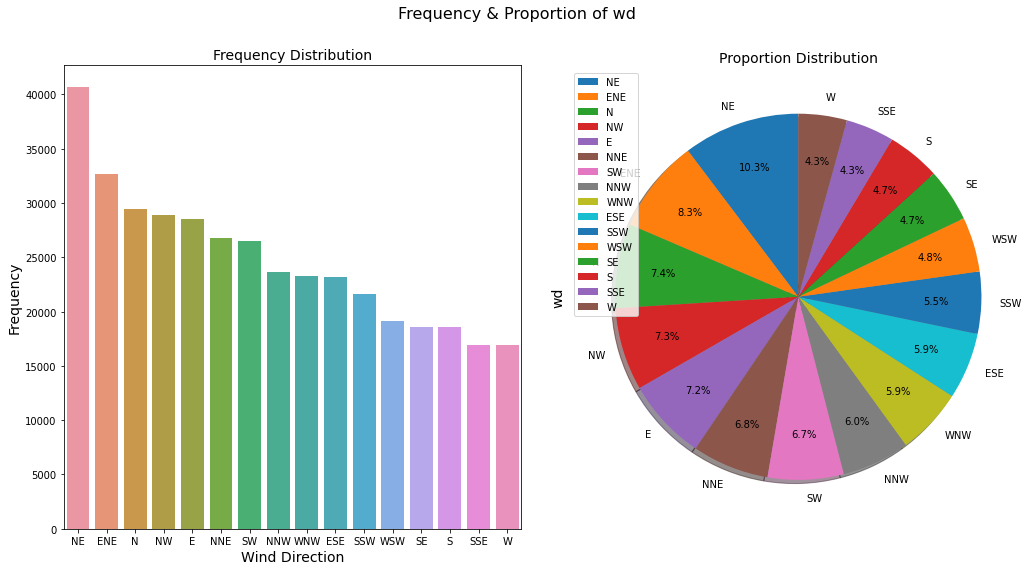

In [ ]:
fig = plt.figure(figsize = [15, 8])
plt.subplot(1, 2, 1)
sns.countplot(x = 'wd', data = train,order=train['wd'].value_counts().index)
plt.tight_layout()
plt.xlabel(xlabel = 'Wind Direction', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution', size = 14)

plt.subplot(1, 2, 2)
wd_dict = train['wd'].value_counts().to_dict()
space = tuple(train['wd'].nunique() * [0])
plt.pie(wd_dict.values(), explode=space, labels=wd_dict.keys(), autopct='%1.1f%%',shadow=True, startangle=90,pctdistance=0.75)
plt.legend(loc = 'best')
plt.ylabel(ylabel = 'wd', size = 14)
plt.title(label = 'Proportion Distribution', size = 14)
plt.tight_layout(pad = 3.0)
plt.suptitle(t = 'Frequency & Proportion of wd', y = 1.02, size = 16)
plt.show()

**Observations:**

- Wind was mostly from **NE**. This makes sense as **Beijing** is located near sea.

**Relationship between PM2.5 and different Stations**

In [ ]:
train.station.unique()

array(['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan',
       'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan',
       'Wanliu', 'Wanshouxigong'], dtype=object)

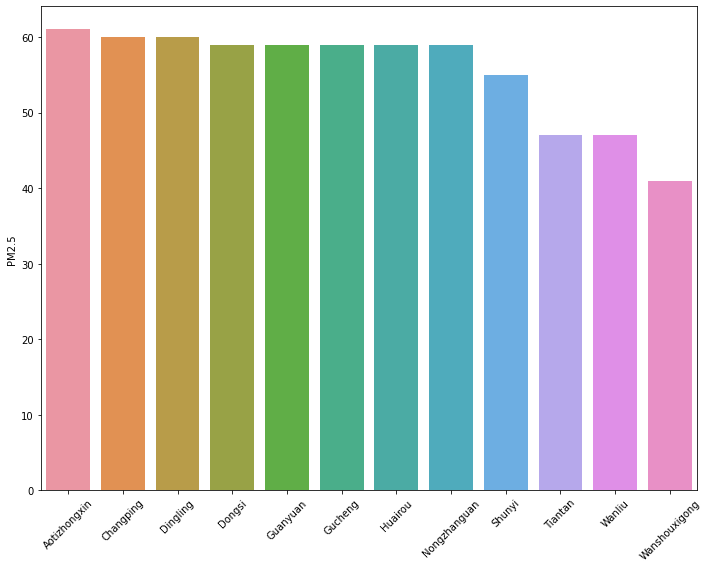

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(train['station'].unique(),train.groupby('station')['PM2.5'].median().sort_values(ascending=False))
plt.xticks(rotation=45)
plt.tight_layout()

**Observations**

- **`Aotizhongxin`** is the most polluted.
- **`Wanshouxigong`** has the **least PM2.5** level.

<a id=section423></a>
#### 4.2.3 Yearly Data exploration

##### Checking the **PM2.5** level on yearly basis. 

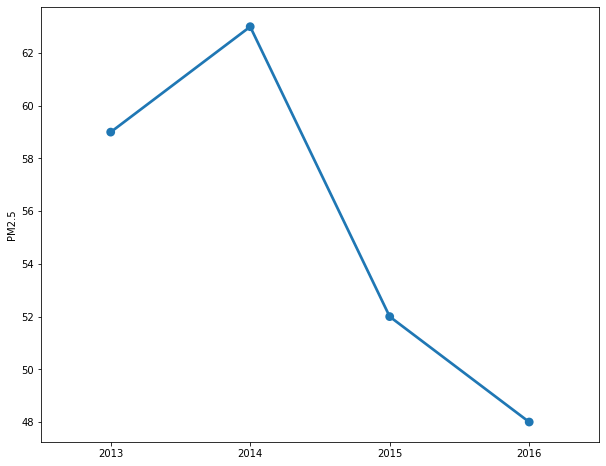

In [ ]:
plt.figure(figsize=(10,8))
sns.pointplot(train['year'].unique(),train.groupby('year')['PM2.5'].median())

**Observations**

- **PM2.5** level was most in **2014** and least in **2016**
- Maybe, the chinese government took some drastic change to control the air pollution.

##### Checking O3 on yearly basis

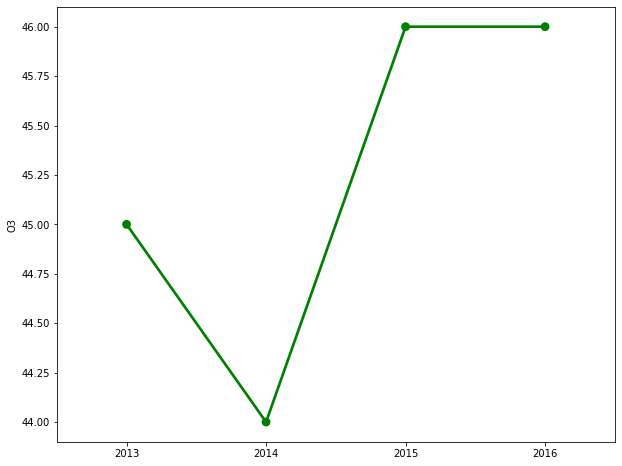

In [ ]:
plt.figure(figsize=(10,8))
sns.pointplot(train['year'].unique(),train.groupby('year')['O3'].median(),color = 'green')

**Observations**

- The **density of the Ozone** layer was **lowest in 2014**, this was due to higher air pollution level during the period.

- Lower **Ozone** density also makes us more vulnerable towards the harmful UV rays from the sun.

##### Checking Yearly Temperature

Text(0.5, 1.0, 'Checking if there are any months data missing in different years')

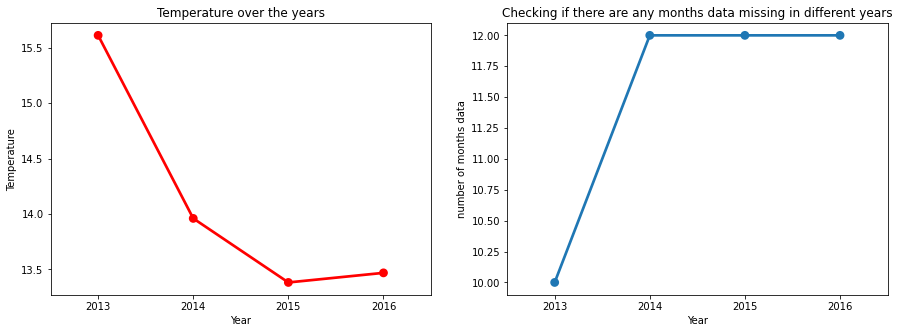

In [ ]:
fig = plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 1)
sns.pointplot(train['year'].unique(),train.groupby('year')['TEMP'].mean(),color = 'Red')
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.title("Temperature over the years")

plt.subplot(1,2,2)
sns.pointplot(train['year'].unique(),train.groupby('year')['month'].nunique())
plt.xlabel("Year")
plt.ylabel("number of months data")
plt.title("Checking if there are any months data missing in different years")

**Observations**

- Even though the **year 2013** had only **10 months** of data, the average temperature was **2 degrees** higher than the rest of the year.

- As seen in the **Ozone Layers** graph, the **density** of **Ozone** was **decreasing till 2014** after which it took up. This is why the average temperature of 2013 was higher.

##### Checking Rain every year

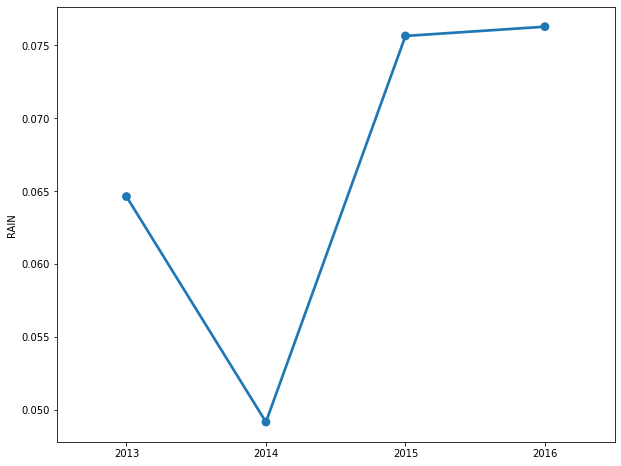

In [ ]:
plt.figure(figsize=(10,8))
sns.pointplot(train['year'].unique(),train.groupby('year')['RAIN'].mean())

**Observations**
 - We see very **minute change** in the rain. However, rain was **lowest in 2014** when **air pollution was higher**.

 - This can also be the reason as **rain brings down most for the particles with it**, cycling the pollution level of the air.

##### Checking SO2 concentration on a Yearly basis

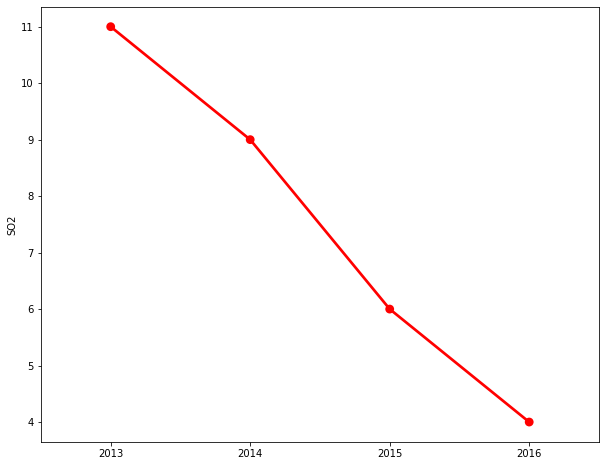

In [ ]:
plt.figure(figsize=(10,8))
sns.pointplot(train['year'].unique(),train.groupby('year')['SO2'].median(),color = 'red')

**Observations:**

- **Sulphure Dioxide(SO2)** shows a decresing trend over the years.
- This confirms the **steps taken** by the **government** had been **rewarding**.

#### Checking NO2 concentration on a yearly basis

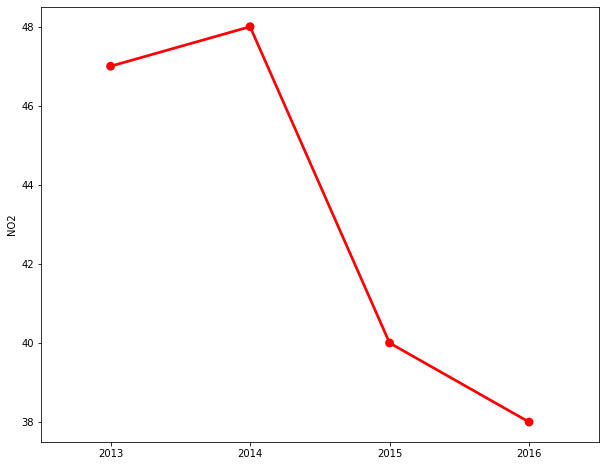

In [ ]:
plt.figure(figsize=(10,8))
sns.pointplot(train['year'].unique(),train.groupby('year')['NO2'].median(),color = 'red')

**Observations:**

- **Nitogen Dioxide(NO2)** shows a decresing trend over the years.
- This confirms the **steps taken** by the **government** had been **rewarding**.



<a id=section424></a>
#### 4.2.4 Monthly Data exploration

**Checking PM2.5 level on monthly basis**

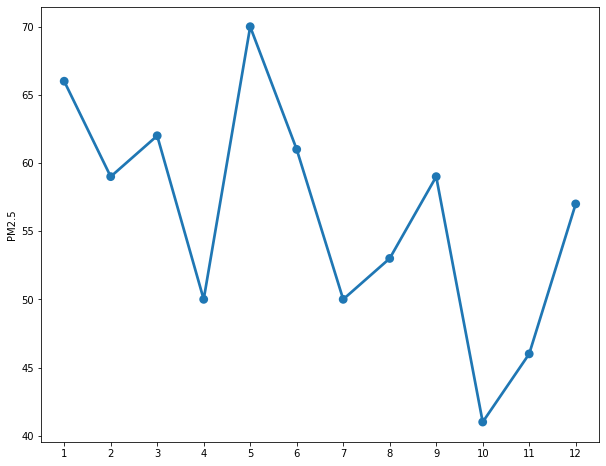

In [ ]:
plt.figure(figsize = (10,8))
sns.pointplot(train['month'].unique(),train.groupby('month')['PM2.5'].median())

**Observations:** 

- PM2.5 level was higheest during the month of **'May'**.

**Checking PM2.5 every month of every year**

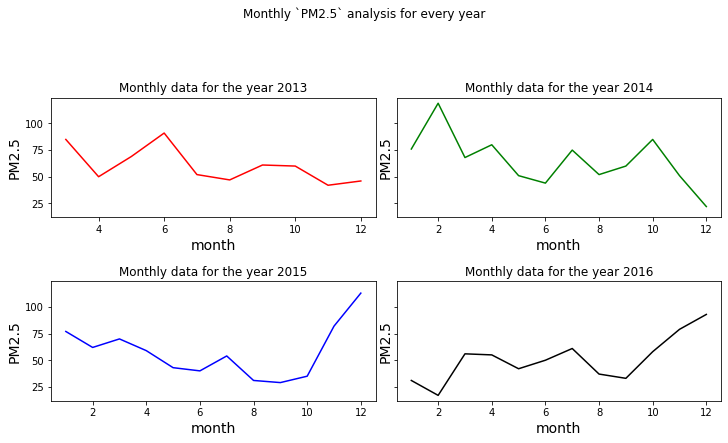

<Figure size 720x360 with 0 Axes>

In [ ]:
group = train.groupby('year')
year_2013 = group.get_group(2013)
year_2014 = group.get_group(2014)
year_2015 = group.get_group(2015)
year_2016 = group.get_group(2016)

fig, ax = plt.subplots(2, 2,figsize=(10,5),sharey=True)
fig.suptitle('Monthly `PM2.5` analysis for every year',y=1.2)
plt.figure(figsize = (10,5))

ax[0,0].plot(year_2013['month'].unique(),year_2013.groupby('month')['PM2.5'].median(),color = 'red')
ax[0,0].set_title('Monthly data for the year 2013')
ax[0,0].set_xlabel(xlabel = 'month', size = 14)
ax[0,0].set_ylabel(ylabel = 'PM2.5', size = 14)

ax[0,1].plot(year_2014['month'].unique(),year_2014.groupby('month')['PM2.5'].median(), color = 'green')
ax[0,1].set_title('Monthly data for the year 2014')
ax[0,1].set_xlabel(xlabel = 'month', size = 14)
ax[0,1].set_ylabel(ylabel = 'PM2.5', size = 14)

ax[1,0].plot(year_2015['month'].unique(),year_2015.groupby('month')['PM2.5'].median(), color = 'blue')
ax[1,0].set_title('Monthly data for the year 2015')
ax[1,0].set_xlabel(xlabel = 'month', size = 14)
ax[1,0].set_ylabel(ylabel = 'PM2.5', size = 14)

ax[1,1].plot(year_2016['month'].unique(),year_2016.groupby('month')['PM2.5'].median(), color = 'black')
ax[1,1].set_title('Monthly data for the year 2016')
ax[1,1].set_xlabel(xlabel = 'month', size = 14)
ax[1,1].set_ylabel(ylabel = 'PM2.5', size = 14)

fig.tight_layout(pad = 0.3,h_pad=1.3)

**Observations:**

- The **year 2013** shows a decreasing trend. however, the process was slow but steady.
- The end of every year **hits** highest mark for pollution level.

**Chcking SO2 level on monthly basis**

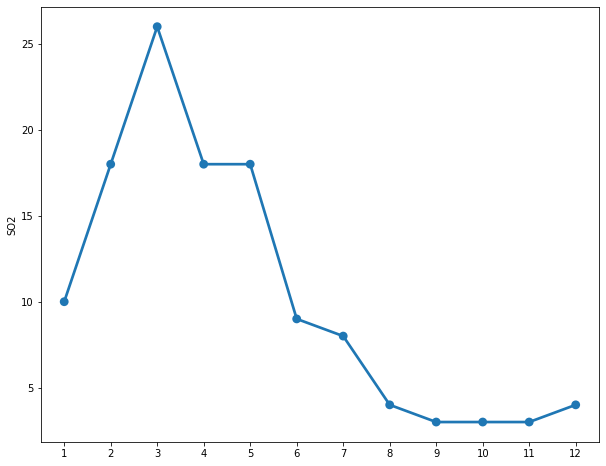

In [ ]:
plt.figure(figsize = (10,8))
sns.pointplot(train['month'].unique(),train.groupby('month')['SO2'].median())

**Observations:**

- Level of **SO2** was higher when pollution was higher.

**SO2 level every month for different years**

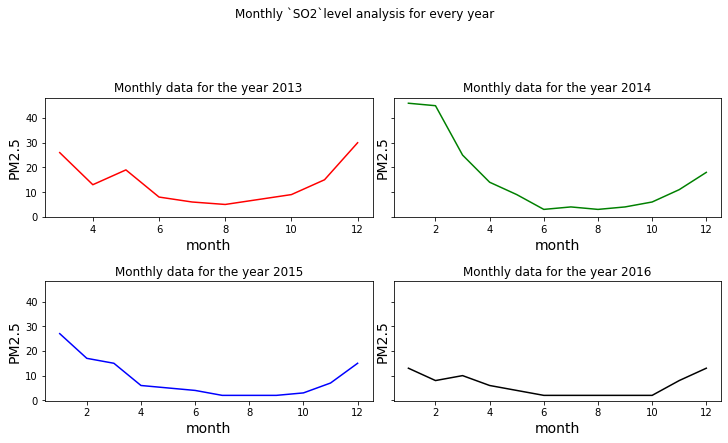

<Figure size 720x360 with 0 Axes>

In [ ]:
group = train.groupby('year')
year_2013 = group.get_group(2013)
year_2014 = group.get_group(2014)
year_2015 = group.get_group(2015)
year_2016 = group.get_group(2016)

fig, ax = plt.subplots(2, 2,figsize=(10,5),sharey=True)
fig.suptitle('Monthly `SO2`level analysis for every year',y=1.2)
plt.figure(figsize = (10,5))

ax[0,0].plot(year_2013['month'].unique(),year_2013.groupby('month')['SO2'].median(),color = 'red')
ax[0,0].set_title('Monthly data for the year 2013')
ax[0,0].set_xlabel(xlabel = 'month', size = 14)
ax[0,0].set_ylabel(ylabel = 'PM2.5', size = 14)

ax[0,1].plot(year_2014['month'].unique(),year_2014.groupby('month')['SO2'].median(), color = 'green')
ax[0,1].set_title('Monthly data for the year 2014')
ax[0,1].set_xlabel(xlabel = 'month', size = 14)
ax[0,1].set_ylabel(ylabel = 'PM2.5', size = 14)

ax[1,0].plot(year_2015['month'].unique(),year_2015.groupby('month')['SO2'].median(), color = 'blue')
ax[1,0].set_title('Monthly data for the year 2015')
ax[1,0].set_xlabel(xlabel = 'month', size = 14)
ax[1,0].set_ylabel(ylabel = 'PM2.5', size = 14)

ax[1,1].plot(year_2016['month'].unique(),year_2016.groupby('month')['SO2'].median(), color = 'black')
ax[1,1].set_title('Monthly data for the year 2016')
ax[1,1].set_xlabel(xlabel = 'month', size = 14)
ax[1,1].set_ylabel(ylabel = 'PM2.5', size = 14)

fig.tight_layout(pad = 0.3,h_pad=1.3)

**Observations:**

- The level of **SO2** hit the **highest benchmark** on the year of 2014.
- At the end of every year, it starts surging.

**Relation between TEMP and PM2.5 on monthly basis.**

Text(0.5, 1.0, 'Monthly analysis of TEMP')

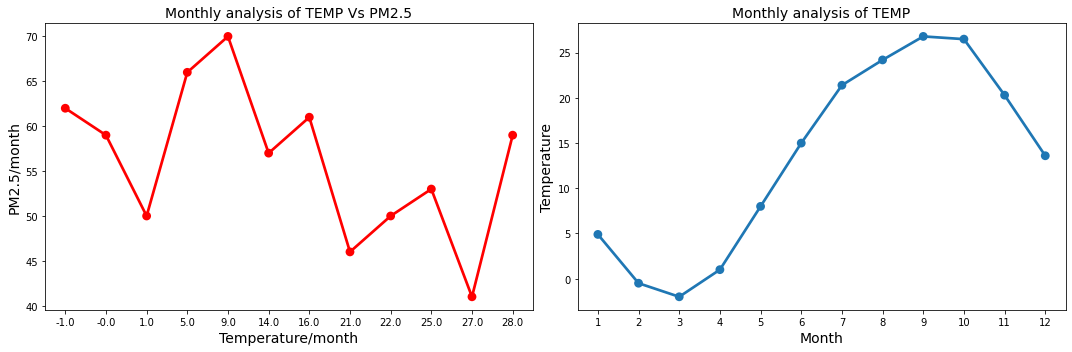

In [ ]:
fig = plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 1)
sns.pointplot(np.ceil(train.groupby('month')['TEMP'].mean()),train.groupby('month')['PM2.5'].median(),color = 'red')
plt.tight_layout()
plt.xlabel(xlabel = 'Temperature/month', size = 14)
plt.ylabel(ylabel = 'PM2.5/month', size = 14)
plt.title(label = 'Monthly analysis of TEMP Vs PM2.5', size = 14)


plt.subplot(1, 2, 2)
sns.pointplot(train['month'].unique(),train.groupby('month')['TEMP'].median())
plt.tight_layout()
plt.xlabel(xlabel = 'Month', size = 14)
plt.ylabel(ylabel = 'Temperature', size = 14)
plt.title(label = 'Monthly analysis of TEMP', size = 14)

**Observations:**

- we can infer that **temperature** had no relation with pollution.
- However, the month of **'May'** has the **average temperature** of **9 degrees**, this is also when **pollution** was higher.

**Relation between DEWP(Dew Point Temperature) and PM2.5 on monthly basis.**

Text(0.5, 1.0, 'Monthly analysis of DEWP')

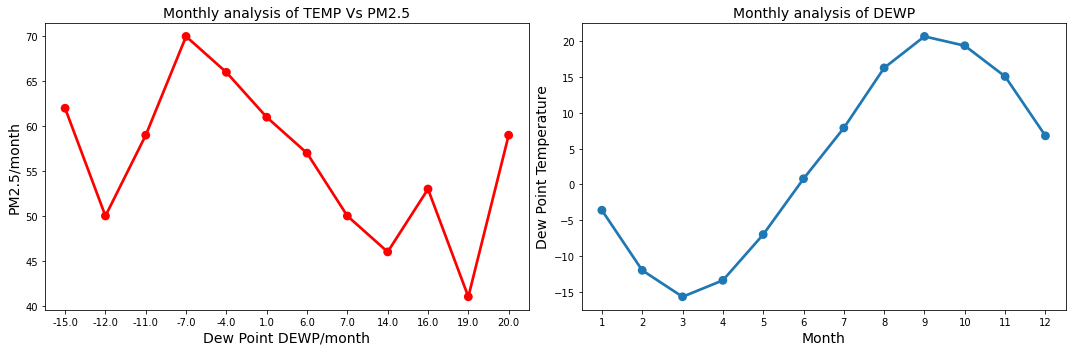

In [ ]:
fig = plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 1)
sns.pointplot(np.ceil(train.groupby('month')['DEWP'].mean()),train.groupby('month')['PM2.5'].median(),color = 'red')
plt.tight_layout()
plt.xlabel(xlabel = 'Dew Point DEWP/month', size = 14)
plt.ylabel(ylabel = 'PM2.5/month', size = 14)
plt.title(label = 'Monthly analysis of TEMP Vs PM2.5', size = 14)


plt.subplot(1, 2, 2)
sns.pointplot(train['month'].unique(),train.groupby('month')['DEWP'].median())
plt.tight_layout()
plt.xlabel(xlabel = 'Month', size = 14)
plt.ylabel(ylabel = 'Dew Point Temperature', size = 14)
plt.title(label = 'Monthly analysis of DEWP', size = 14)

**Observations:**

- The time when **DEWP** was **lower** the **pollution level was higher**.
- Months from **"Jan to May"** had lower **DEWP**

<a id=section5></a>
## 5. Feature Engineering and Selection

**Checking for datatypes of each variable**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395301 entries, 0 to 403775
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   REF_NO   395301 non-null  int64  
 1   year     395301 non-null  int64  
 2   month    395301 non-null  int64  
 3   day      395301 non-null  int64  
 4   hour     395301 non-null  int64  
 5   PM2.5    395301 non-null  float64
 6   PM10     395301 non-null  float64
 7   SO2      395301 non-null  float64
 8   NO2      395301 non-null  float64
 9   CO       395301 non-null  float64
 10  O3       395301 non-null  float64
 11  TEMP     395301 non-null  float64
 12  PRES     395301 non-null  float64
 13  DEWP     395301 non-null  float64
 14  RAIN     395301 non-null  float64
 15  wd       395301 non-null  object 
 16  WSPM     395301 non-null  float64
 17  station  395301 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 67.3+ MB


- We can see that the columns `year` is in **int** have to convert it to object.
- Other than that every columns have the right datatype.

In [ ]:
train['year'] = train['year'].astype(object)

**Checking for correlation between variables**

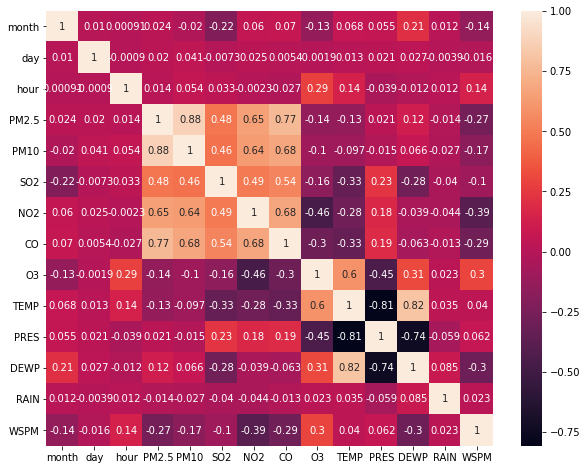

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(train.drop('REF_NO',axis = 1).corr(),annot=True)

**Observations:**

- We see that `TEMP` and `DEWP` are highly correlated.So, we can drop either one of them.

- We will now drop `TEMP` and `REF_NO` for model building.

In [22]:
train_encoded = train.drop(['REF_NO','TEMP'],axis = 1)



<a id=section51></a>
#### 5.1 Encoding categorical data.

In [23]:
train_encoded.select_dtypes(include = object).columns

Index(['wd', 'station'], dtype='object')

In [24]:
train_encoded['year'] = LabelEncoder().fit_transform(train_encoded['year'])
train_encoded = pd.get_dummies(train_encoded,drop_first=True)
train_encoded.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,PRES,DEWP,RAIN,WSPM,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW,station_Changping,station_Dingling,station_Dongsi,station_Guanyuan,station_Gucheng,station_Huairou,station_Nongzhanguan,station_Shunyi,station_Tiantan,station_Wanliu,station_Wanshouxigong
0,0,3,1,0,4.00000,4.00000,4.00000,7.00000,300.00000,77.00000,1023.00000,-18.80000,0.00000,4.40000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,3,1,1,8.00000,8.00000,4.00000,7.00000,300.00000,77.00000,1023.20000,-18.20000,0.00000,4.70000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,3,1,2,7.00000,7.00000,5.00000,10.00000,300.00000,73.00000,1023.50000,-18.20000,0.00000,5.60000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,3,1,3,6.00000,6.00000,11.00000,11.00000,300.00000,72.00000,1024.50000,-19.40000,0.00000,3.10000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,3,1,4,3.00000,3.00000,12.00000,12.00000,300.00000,72.00000,1025.20000,-19.50000,0.00000,2.00000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<a id=section6></a>
## 6. Model Building

**Splitting data into x and y**

</br>x = **Independet Features**
</br>y = **Dependent Feature**

In [25]:
x = train_encoded.drop('PM2.5',axis = 1)
y = train_encoded['PM2.5']

**Splitting data in train and test**

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)
print(f"shape of x_train is {x_train.shape}")
print(f"shape of x_test is {x_test.shape}")
print(f"shape of y_train is {y_train.shape}")
print(f"shape of y_train is {y_test.shape}")

shape of x_train is (276710, 39)
shape of x_test is (118591, 39)
shape of y_train is (276710,)
shape of y_train is (118591,)


**Creating a function that evaluates our model**

In [27]:
def evaluate(model):
  prediction = model.predict(x_test)
  train_pred = model.predict(x_train)
  dict_1 = {'RMSE':[ np.sqrt(mean_squared_error(y_train,train_pred)),np.sqrt(mean_squared_error(y_test,prediction))],
            'R-Squared':[r2_score(y_train,train_pred),r2_score(y_test,prediction)]}
  d = pd.DataFrame(dict_1,index = ['Train','Test'])
  return d

<a id=section61></a>
### 6.1 Linear Regression Model

In [28]:
linear = LinearRegression().fit(x_train,y_train)
evaluate(linear)

,RMSE,R-Squared
Train,31.84450,0.83791
Test,31.65442,0.84051


**Observations:**

It show **good fit**.
The model is **not overfitting** and **no difference** in the values of **metrics**. Showing, it **predictions** are more **reliable**.

**Using K-Fold CV for LinearRegregression**

In [ ]:
from sklearn import metrics

In [ ]:
scores_linear = cross_val_score(estimator=linear, X = x_train,y =  y_train, cv=5,scoring='neg_mean_squared_error')
np.sqrt(np.abs(scores)).mean()

26.674073005638

<a id=section62></a>
### 6.2 DecisionTree Model

In [ ]:
dt = DecisionTreeRegressor().fit(x_train,y_train)
evaluate(dt)

,RMSE,R-Squared
Train,0.00000,1.00000
Test,25.16754,0.89895


**Observations:**

As we know **DecisionTrees** are prone to overfitting. We can observe here that it really did **overfit** on our **large training data**.

**Using K-Fold CV**

In [ ]:
scores_dt = cross_val_score(estimator=dt,X= x_train,y= y_train, cv=5,scoring='neg_mean_squared_error')
np.sqrt(np.abs(scores)).mean()

26.674073005638

<a id=section63></a>
### 6.3 RandomForest Model

In [ ]:
rf = RandomForestRegressor().fit(x_train,y_train)
evaluate(rf)

,RMSE,R-Squared
Train,6.58859,0.99307
Test,17.21085,0.95274


**Using K-Fold CV**

In [ ]:
scores_rf = cross_val_score(estimator=rf,X= x_train,y= y_train, cv=5,scoring='neg_mean_squared_error')
np.sqrt(np.abs(scores)).mean()

26.674073005638

<a id=section7></a>
## 7. Predicting on Test Data.

**Moving forward** with the **LinearRegression** model as it shows no sign of overfitting, and also shows a good fit to the data.

- **Copying** the test data to create a new copied data frame for further process.

- This is done to go back to original test data when irreversible mistake is made.

In [ ]:
TEST = test.copy()

**Removing `TEMP` feature from our test data.**

In [ ]:
TEST.head()

,REF_NO,year,month,day,hour,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,33649,2017,1,1,0,496.00000,8.00000,121.00000,6100.00000,4.00000,-4.70000,1022.10000,-6.10000,0.00000,ENE,1.00000,Aotizhongxin
1,33650,2017,1,1,1,497.00000,7.00000,113.00000,6300.00000,4.00000,-5.20000,1022.30000,-6.40000,0.00000,E,0.70000,Aotizhongxin
2,33651,2017,1,1,2,469.00000,7.00000,111.00000,6200.00000,4.00000,-5.40000,1022.50000,-6.50000,0.00000,ENE,1.10000,Aotizhongxin
3,33652,2017,1,1,3,425.00000,6.00000,109.00000,5900.00000,3.00000,-5.20000,1022.50000,-6.20000,0.00000,E,1.10000,Aotizhongxin
4,33653,2017,1,1,4,468.00000,10.00000,123.00000,7700.00000,16.00000,-5.00000,1021.90000,-5.80000,0.00000,ENE,1.00000,Aotizhongxin


In [ ]:
dropped = TEST.drop(['REF_NO','TEMP'],axis = 1)

**Checking for datatypes in test data**

In [ ]:
dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16728 entries, 0 to 16727
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     16728 non-null  int64  
 1   month    16728 non-null  int64  
 2   day      16728 non-null  int64  
 3   hour     16728 non-null  int64  
 4   PM10     16728 non-null  float64
 5   SO2      16728 non-null  float64
 6   NO2      16728 non-null  float64
 7   CO       16728 non-null  float64
 8   O3       16728 non-null  float64
 9   PRES     16728 non-null  float64
 10  DEWP     16728 non-null  float64
 11  RAIN     16728 non-null  float64
 12  wd       16728 non-null  object 
 13  WSPM     16728 non-null  float64
 14  station  16728 non-null  object 
dtypes: float64(9), int64(4), object(2)
memory usage: 1.9+ MB


In [ ]:
dropped['year'] = dropped['year'].astype(object) #converting year from int to object

**Encoding** *Categorical features* in our **Test data**

In [ ]:
dropped['year'] = LabelEncoder().fit_transform(dropped['year'])
dropped = pd.get_dummies(dropped,drop_first=True)
dropped.head()

,year,month,day,hour,PM10,SO2,NO2,CO,O3,PRES,DEWP,RAIN,WSPM,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW,station_Changping,station_Dingling,station_Dongsi,station_Guanyuan,station_Gucheng,station_Huairou,station_Nongzhanguan,station_Shunyi,station_Tiantan,station_Wanliu,station_Wanshouxigong
0,0,1,1,0,496.00000,8.00000,121.00000,6100.00000,4.00000,1022.10000,-6.10000,0.00000,1.00000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,497.00000,7.00000,113.00000,6300.00000,4.00000,1022.30000,-6.40000,0.00000,0.70000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,2,469.00000,7.00000,111.00000,6200.00000,4.00000,1022.50000,-6.50000,0.00000,1.10000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,3,425.00000,6.00000,109.00000,5900.00000,3.00000,1022.50000,-6.20000,0.00000,1.10000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,4,468.00000,10.00000,123.00000,7700.00000,16.00000,1021.90000,-5.80000,0.00000,1.00000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **Using LinearRegression model to predict and saving the predicted output as csv** 

In [ ]:
test_pred = linear.predict(dropped)

**Saving** it as a **dataframe** and adding the `REF_NO` column 

In [ ]:
submission = pd.DataFrame(np.array(test['REF_NO']),columns=['NO'])
submission['prediction'] = test_pred
submission.head()

In [ ]:
submission.to_csv("sample_submission.csv", index = False, header=False)

<a id=section8></a>
## 8. Conclusion

- We studied **in-depth** about the various **features** in the data, their **characteristics** and their **distributions**.

- We went through an **extensive** and **thorough** data analysis process, exploring various relationships between the **Revenue Grid** and the different **features**.

- We **encoded** the *categorical data* and **removed** highly *correlated columns* to make our dataset fit for training.

- We tested different models, performed **cross-validation** on them, and compared their performace.

- The **LinearRegression** model was the **best** model with the most **optimal** result.

- **RMSE** obtained by the **LinearRegression** model was **31.5**